In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pylab
import collections

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
print("Before")
print(train_df.columns.values)

# Remove annoying quotes
label_list = list(train_df.columns.values)
for el, label in enumerate(label_list):
    label_list[el] = label.strip("\'\’") 
train_df.columns = label_list

label_list = list(test_df.columns.values)
for el, label in enumerate(label_list):
    label_list[el] = label.strip("\'\’") 
test_df.columns = label_list

print("After")
print(train_df.columns.values)

print("Test")
print(test_df.columns.values)

Before
["'Id'" "'Chunk_Id'" "'Brake'" "'Gas'" "'Velocity'" "'Steering'"
 "'Lon_acc'" "'Lat_acc'" "'Category'"]
After
['Id' 'Chunk_Id' 'Brake' 'Gas' 'Velocity' 'Steering' 'Lon_acc' 'Lat_acc'
 'Category']
Test
['Id' 'Chunk_Id' 'Brake' 'Gas' 'Velocity' 'Steering' 'Lon_acc' 'Lat_acc']


In [4]:
train_df.head()

,Id,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc,Category
0,'0',0,0.1329,0.3156,19.0509,-10.3979,-0.0239,0.0119,'0'
1,'1',0,0.1493,0.5554,19.0052,-10.6694,-0.0253,0.0090,'0'
2,'2',0,0.1530,0.7939,19.0123,-9.9072,-0.0245,0.0078,'0'
3,'3',0,0.1427,0.9724,19.0338,-9.1565,-0.0225,0.0118,'0'
4,'4',0,0.1448,1.1330,19.0449,-9.1151,-0.0237,0.0094,'0'


In [5]:
train_df.tail()

,Id,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc,Category
260411,'260411',45,0.2617,8.9257,23.3459,4.2808,0.0431,0.0210,'0'
260412,'260412',45,0.3212,10.2578,23.2567,5.5771,0.0484,0.0244,'0'
260413,'260413',45,0.2271,11.3305,23.2269,8.6533,0.0486,0.0244,'0'
260414,'260414',45,0.1305,12.1118,23.1628,14.1465,0.0489,0.0250,'0'
260415,'260415',45,0.0237,12.3315,23.0621,15.3550,0.0509,0.0269,'0'


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260416 entries, 0 to 260415
Data columns (total 9 columns):
Id          260416 non-null object
Chunk_Id    260416 non-null int64
Brake       260416 non-null float64
Gas         260416 non-null float64
Velocity    260416 non-null float64
Steering    260416 non-null float64
Lon_acc     260416 non-null float64
Lat_acc     260416 non-null float64
Category    260416 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 17.9+ MB


In [7]:
train_df.describe()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc
count,260416.000000,260416.000000,260416.000000,260416.000000,260416.000000,260416.000000,260416.000000
mean,21.436214,0.765570,8.462738,84.800631,-0.817910,0.005919,0.010410
std,13.591485,3.167018,8.548099,16.907625,16.411863,0.042064,0.033955
min,0.000000,-0.838100,-2.984200,-0.569400,-144.308000,-0.279900,-0.127600
25%,9.000000,-0.024100,0.391300,75.204250,-2.728725,-0.016500,-0.007300
50%,20.000000,0.126400,7.149600,87.460650,0.092100,0.005100,0.006800
75%,34.000000,0.356500,13.980750,96.374000,2.616100,0.026700,0.022700
max,45.000000,41.003000,206.121000,128.355000,692.799000,0.237600,0.440500


In [8]:
test_df.describe()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc
count,74175.000000,74175.000000,74175.000000,74175.000000,74175.000000,74175.000000,74175.000000
mean,52.343323,0.693354,6.009206,80.812965,-0.795658,0.009559,0.008826
std,3.397444,2.813998,7.283171,14.501082,7.723943,0.043696,0.032643
min,46.000000,-0.634500,-4.307000,13.218200,-82.264600,-0.238100,-0.141000
25%,50.000000,0.020000,0.201550,72.732050,-2.583800,-0.015000,-0.008100
50%,53.000000,0.165500,2.783900,82.133500,0.188900,0.007300,0.005500
75%,55.000000,0.398950,10.112950,90.150350,2.703500,0.031900,0.020200
max,58.000000,26.523500,90.817500,117.252000,31.281200,0.202900,0.289400


In [9]:
train_df.describe(include=['O'])

,Id,Category
count,260416,260416
unique,260416,3
top,'142137','0'
freq,1,214591


In [10]:
train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260416 entries, 0 to 260415
Data columns (total 8 columns):
Chunk_Id    260416 non-null int64
Brake       260416 non-null float64
Gas         260416 non-null float64
Velocity    260416 non-null float64
Steering    260416 non-null float64
Lon_acc     260416 non-null float64
Lat_acc     260416 non-null float64
Category    260416 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 15.9+ MB


(-90, 90)

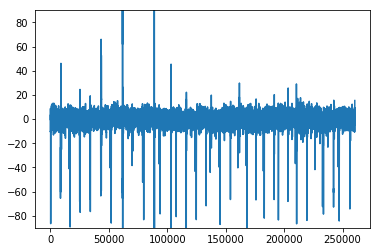

In [12]:
pylab.plot(train_df['Steering'])
pylab.ylim(-90, 90)

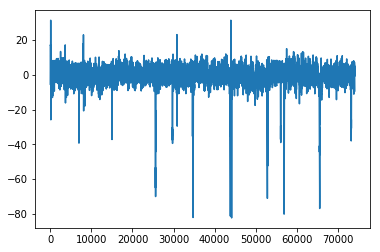

In [13]:
plt.plot(test_df['Steering'])

In [14]:
# Normalization ranges
print(train_df.columns[1:-1])
min_ranges = [0, 0, 0, -90, -0.4, -0.4]
max_ranges = [50, 250, 130, 90, 0.4, 0.4]

Index(['Brake', 'Gas', 'Velocity', 'Steering', 'Lon_acc', 'Lat_acc'], dtype='object')


In [15]:


# Normalization
for idx, col in enumerate(train_df.columns[1:-1]):
    train_df[col] = np.maximum(-1,np.minimum(1,-1+2*(train_df[col]-min_ranges[idx])/(max_ranges[idx]-min_ranges[idx]))    )
    
for idx, col in enumerate(test_df.columns[1:]):
    test_df[col] = np.maximum(-1,np.minimum(1,-1+2*(test_df[col]-min_ranges[idx])/(max_ranges[idx]-min_ranges[idx])))


In [16]:
train_df.describe()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc
count,260416.000000,260416.000000,260416.000000,260416.000000,260416.000000,260416.000000,260416.000000
mean,21.436214,-0.967720,-0.932251,0.304628,-0.011829,0.014797,0.026022
std,13.591485,0.126200,0.068337,0.260103,0.103394,0.105159,0.084843
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.699750,-0.319000
25%,9.000000,-1.000000,-0.996870,0.156988,-0.030319,-0.041250,-0.018250
50%,20.000000,-0.994944,-0.942803,0.345548,0.001023,0.012750,0.017000
75%,34.000000,-0.985740,-0.888154,0.482677,0.029068,0.066750,0.056750
max,45.000000,0.640120,0.648968,0.974692,1.000000,0.594000,1.000000


In [17]:
test_df.describe()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc
count,74175.000000,74175.000000,74175.000000,74175.000000,74175.000000,74175.000000,74175.000000
mean,52.343323,-0.971342,-0.951872,0.243276,-0.008841,0.023897,0.022066
std,3.397444,0.112300,0.058218,0.223094,0.085822,0.109240,0.081607
min,46.000000,-1.000000,-1.000000,-0.796643,-0.914051,-0.595250,-0.352500
25%,50.000000,-0.999200,-0.998388,0.118955,-0.028709,-0.037500,-0.020250
50%,53.000000,-0.993380,-0.977729,0.263592,0.002099,0.018250,0.013750
75%,55.000000,-0.984042,-0.919096,0.386928,0.030039,0.079750,0.050500
max,58.000000,0.060940,-0.273460,0.803877,0.347569,0.507250,0.723500


In [18]:
# Convert category to int
category_mapping = {'-1': -1, '0': 0, '1': 1}
train_df['Category'] = train_df['Category'].str.strip("\'\’").map(category_mapping)
train_df.head()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc,Category
0,0,-0.994684,-0.997475,-0.706909,-0.115532,-0.05975,0.02975,0
1,0,-0.994028,-0.995557,-0.707612,-0.118549,-0.06325,0.02250,0
2,0,-0.993880,-0.993649,-0.707503,-0.110080,-0.06125,0.01950,0
3,0,-0.994292,-0.992221,-0.707172,-0.101739,-0.05625,0.02950,0
4,0,-0.994208,-0.990936,-0.707002,-0.101279,-0.05925,0.02350,0


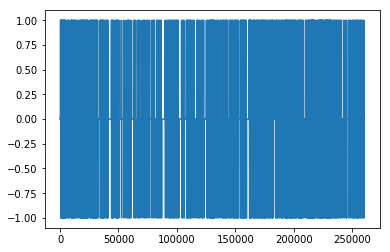

In [19]:
plt.plot(train_df['Category'])

In [20]:
train_df.tail()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc,Category
260411,45,-0.989532,-0.928594,-0.640832,0.047564,0.10775,0.05250,0
260412,45,-0.987152,-0.917938,-0.642205,0.061968,0.12100,0.06100,0
260413,45,-0.990916,-0.909356,-0.642663,0.096148,0.12150,0.06100,0
260414,45,-0.994780,-0.903106,-0.643649,0.157183,0.12225,0.06250,0
260415,45,-0.999052,-0.901348,-0.645198,0.170611,0.12725,0.06725,0


In [21]:
chunk_groups = collections.Counter(train_df.Chunk_Id)
print(chunk_groups.items()) 

dict_items([(0, 9009), (1, 3445), (2, 4266), (3, 8471), (4, 8819), (5, 9252), (6, 4107), (7, 4556), (8, 9986), (9, 4101), (10, 4790), (11, 4229), (12, 4697), (13, 9367), (14, 4745), (15, 9395), (16, 4204), (17, 8908), (18, 3851), (19, 4504), (20, 8606), (21, 4353), (22, 3535), (23, 3960), (24, 9007), (25, 3323), (26, 4186), (27, 3098), (28, 3385), (29, 7812), (30, 3349), (31, 3592), (32, 8593), (33, 3503), (34, 8372), (35, 3338), (36, 3737), (37, 9120), (38, 3475), (39, 4058), (40, 3175), (41, 3181), (42, 8965), (43, 4629), (44, 9310), (45, 4052)])


In [22]:
#31 chunks for training, 14 for validation
TRAIN_CHUNKS = 31
VAL_CHUNKS = 14
trainsplit_df = pd.concat( [train_df.query('Chunk_Id==%d'%key) for key,val in chunk_groups.items() if key <= TRAIN_CHUNKS ] )
valsplit_df = pd.concat( [train_df.query('Chunk_Id==%d'%key) for key,val in chunk_groups.items() if key >TRAIN_CHUNKS ] )   

In [24]:
trainsplit_df.tail()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc,Category
182903,31,-0.980844,-0.941733,0.552938,0.000760,0.03550,0.04300,0
182904,31,-0.981700,-0.943966,0.555969,0.014127,0.07025,0.08900,0
182905,31,-0.981904,-0.946762,0.561277,0.049424,0.08675,0.08550,0
182906,31,-0.982312,-0.948618,0.572662,0.055324,0.06725,0.09375,0
182907,31,-0.982312,-0.948764,0.570338,0.048611,-0.00900,-0.02500,0


In [25]:
valsplit_df.head()

,Chunk_Id,Brake,Gas,Velocity,Steering,Lon_acc,Lat_acc,Category
182908,32,-0.990688,-0.981860,-0.320895,-0.203266,-0.10775,0.08525,0
182909,32,-0.991160,-0.974573,-0.322897,-0.208287,-0.10525,0.08725,0
182910,32,-0.990428,-0.968479,-0.324880,-0.218101,-0.10125,0.08950,0
182911,32,-0.990524,-0.963811,-0.326312,-0.229607,-0.09650,0.09175,0
182912,32,-0.989968,-0.960298,-0.327795,-0.231998,-0.09200,0.09825,0


In [26]:
trainsplit_df.to_csv('../input_data/trainsplit.csv')

In [27]:
valsplit_df.to_csv('../input_data/valsplit.csv')

In [28]:
train_df.to_csv('../input_data/train.csv')

In [29]:
test_df.to_csv('../input_data/test.csv')

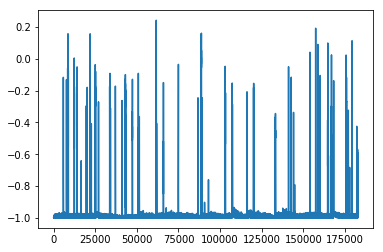

In [30]:
plt.plot(trainsplit_df['Brake'])

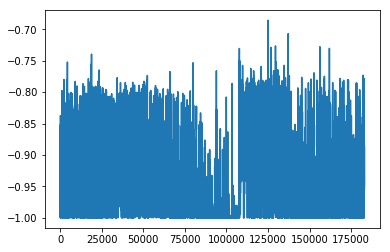

In [31]:
plt.plot(trainsplit_df['Gas'])

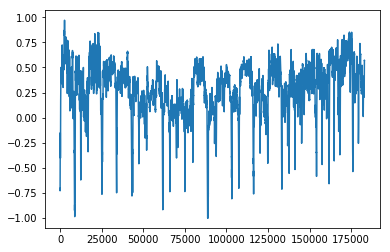

In [32]:
plt.plot(trainsplit_df['Velocity'])

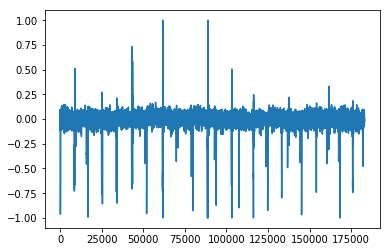

In [33]:
plt.plot(trainsplit_df['Steering'])

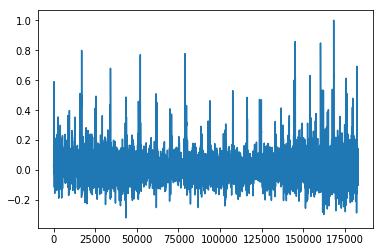

In [34]:
plt.plot(trainsplit_df['Lat_acc'])

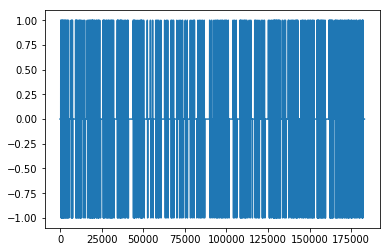

In [35]:
plt.plot(trainsplit_df['Category'])

(array([  15137.,       0.,       0.,       0.,       0.,  151920.,
              0.,       0.,       0.,   15851.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

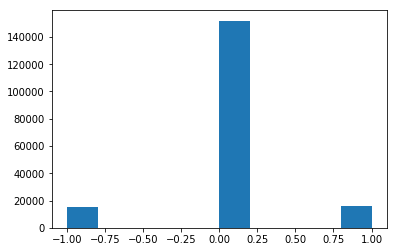

In [38]:
plt.hist(trainsplit_df['Category'])